In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
from arch import arch_model
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
from arch import arch_model
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,8]

In [8]:
def MAE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred)))

def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true - y_pred))/(y_true))*100

In [3]:
df = pd.read_csv('Brent monthly crude oil spot price.csv')
df.head()

,Brent crude oil spot price,Monthly (dollars per barrel)
0,1990 01,21.251
1,1990 02,19.813
2,1990 03,18.387
3,1990 04,16.612
4,1990 05,16.352


In [4]:
df.tail()

,Brent crude oil spot price,Monthly (dollars per barrel)
391,2022 08,60.0
392,2022 09,60.0
393,2022 10,61.0
394,2022 11,61.0
395,2022 12,61.0


In [5]:
df.shape

(396, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brent crude oil spot price     396 non-null    object 
 1    Monthly (dollars per barrel)  396 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [7]:
df.isnull().sum()

Brent crude oil spot price       0
 Monthly (dollars per barrel)    0
dtype: int64

In [8]:
time = pd.date_range(start='1/1/1990',periods=396,freq='M')
df['time_stamp'] = pd.DataFrame(time)
df.drop(['Brent crude oil spot price'],axis=1,inplace=True)
df = df.set_index('time_stamp')

In [10]:
df.columns=['dollars_per_barrel']

In [11]:
df

,dollars_per_barrel
time_stamp,
1990-01-31,21.251
1990-02-28,19.813
1990-03-31,18.387
1990-04-30,16.612
1990-05-31,16.352
...,...
2022-08-31,60.000
2022-09-30,60.000
2022-10-31,61.000


In [12]:
df.head()

,dollars_per_barrel
time_stamp,
1990-01-31,21.251
1990-02-28,19.813
1990-03-31,18.387
1990-04-30,16.612
1990-05-31,16.352


In [13]:
df.tail()

,dollars_per_barrel
time_stamp,
2022-08-31,60.0
2022-09-30,60.0
2022-10-31,61.0
2022-11-30,61.0
2022-12-31,61.0


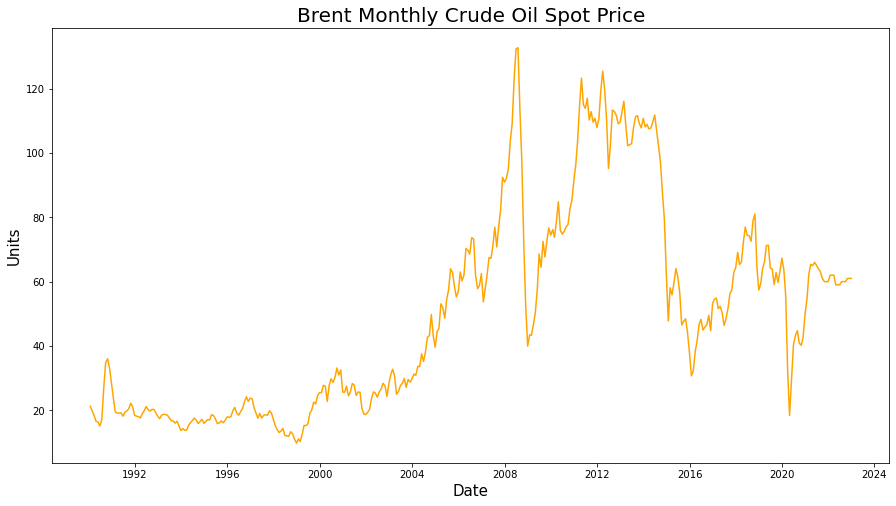

In [19]:
plt.plot(df,color='orange')
plt.title('Brent Monthly Crude Oil Spot Price',fontsize=20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Units',fontsize=15)
plt.show()

In [20]:
plt.rcParams['figure.figsize'] = [15,8]

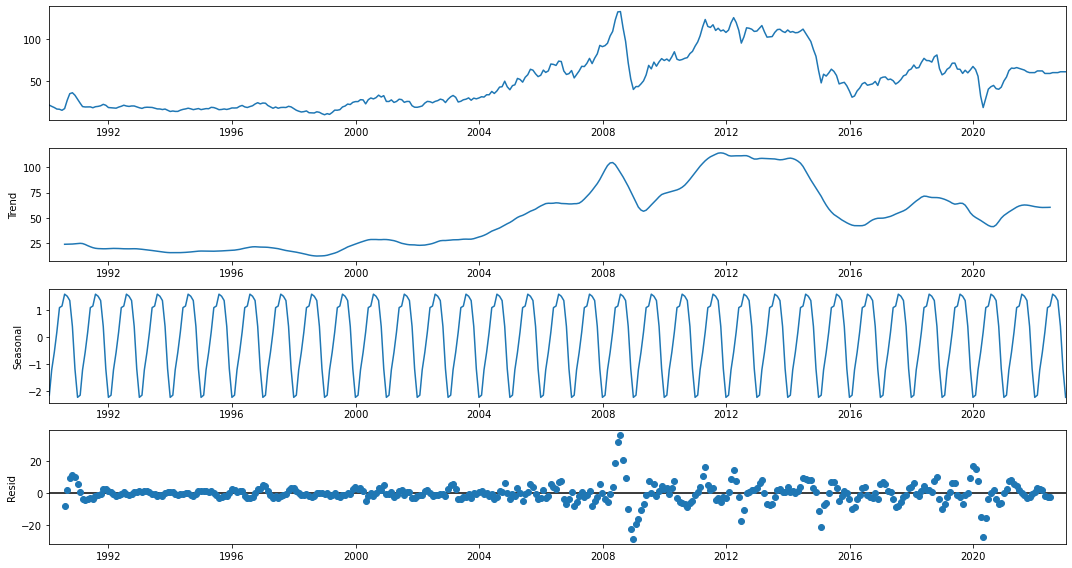

In [13]:
decomposition_model = seasonal_decompose(df,model='additive')
decomposition_model.plot();

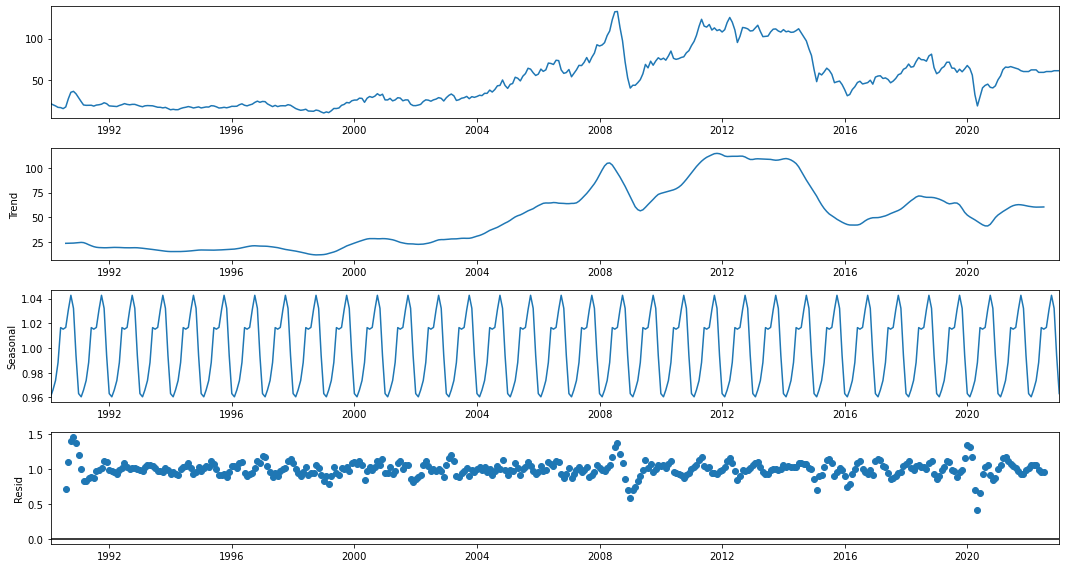

In [14]:
decomposition_model = seasonal_decompose(df,model='multiplicative')
decomposition_model.plot();

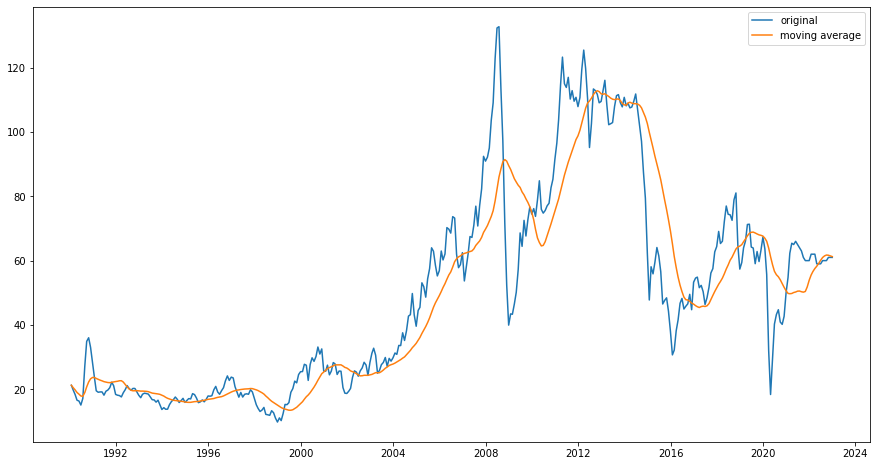

In [17]:
plt.plot(df,label='original')
plt.plot(df.rolling(20,min_periods=0).mean(),label='moving average')
plt.legend(loc='best')
plt.show()

In [18]:
# Model building - Exponential Smoothing Techniques

In [21]:
train = df.iloc[:350]
test = df.iloc[350:]

In [22]:
train.tail()

,dollars_per_barrel
time_stamp,
2018-10-31,81.032
2018-11-30,64.748
2018-12-31,57.362
2019-01-31,59.410
2019-02-28,63.961


In [23]:
test.head()

,dollars_per_barrel
time_stamp,
2019-03-31,66.139
2019-04-30,71.233
2019-05-31,71.318
2019-06-30,64.221
2019-07-31,63.919


In [24]:
len(train)

350

In [25]:
len(test)

46

##### Simple Exponential Smoothing

In [26]:
SES = SimpleExpSmoothing(train,initialization_method='estimated')
SES_model = SES.fit(optimized=True)
SES_model.summary()

Dep. Variable:,dollars_per_barrel,No. Observations:,350
Model:,SimpleExpSmoothing,SSE,7759.791
Optimized:,True,AIC,1088.572
Trend:,None,BIC,1096.288
Seasonal:,None,AICC,1088.688
Seasonal Periods:,None,Date:,"Thu, 31 Mar 2022"
Box-Cox:,False,Time:,18:47:49
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,21.243742,l.0,True


In [27]:
SES_predict = SES_model.forecast(len(test))

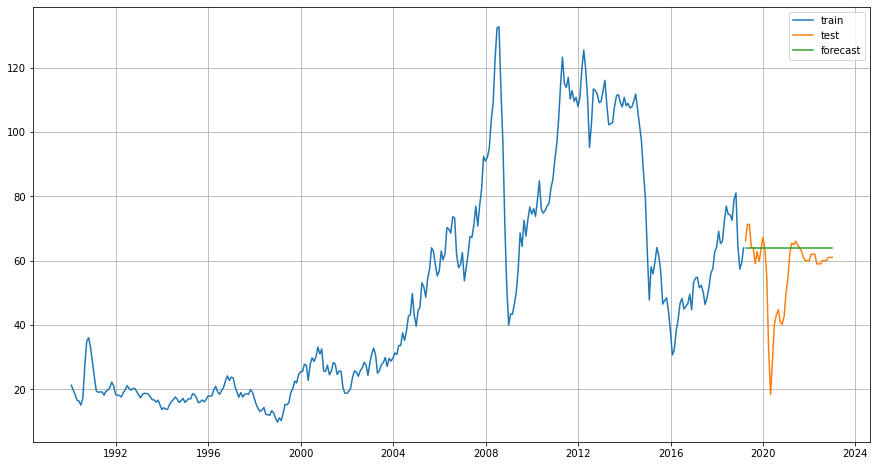

In [28]:
plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(SES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [29]:
print("MAE:",MAE(test['dollars_per_barrel'],SES_predict))
print("MAPE:",MAPE(test['dollars_per_barrel'],SES_predict))

MAE: 8.081391266017496
MAPE: 21.628255299663966


##### Double Exponential Smoothing

In [30]:
DES = Holt(train,exponential=False,initialization_method='estimated')
DES_model = DES.fit(smoothing_level=1.0000000,
                   smoothing_trend=0.1)
DES_model.summary()

Dep. Variable:,dollars_per_barrel,No. Observations:,350
Model:,Holt,SSE,8028.824
Optimized:,True,AIC,1104.501
Trend:,Additive,BIC,1119.933
Seasonal:,None,AICC,1104.746
Seasonal Periods:,None,Date:,"Thu, 31 Mar 2022"
Box-Cox:,False,Time:,18:49:00
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
smoothing_trend,0.1000000,beta,False


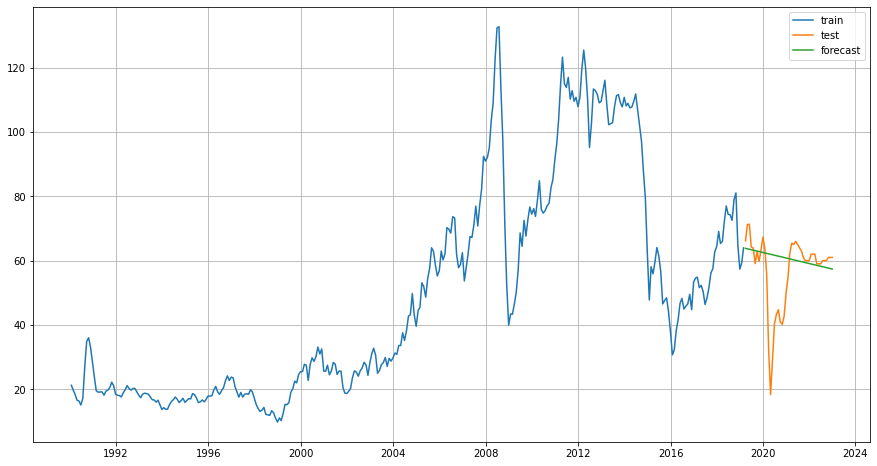

In [31]:
DES_predict = DES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(DES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [32]:
print("MAE:",MAE(test['dollars_per_barrel'],DES_predict))
print("MAPE:",MAPE(test['dollars_per_barrel'],DES_predict))

MAE: 7.3897651513037985
MAPE: 19.80088731955623


##### Triple Exponential Smoothing

In [33]:
TES = ExponentialSmoothing(train,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
TES_model = TES.fit(smoothing_level=1.0000000,
                   smoothing_trend=0.2096e-11,
                   smoothing_seasonal=2.6174e-02)
TES_model.summary()

Dep. Variable:,dollars_per_barrel,No. Observations:,350
Model:,ExponentialSmoothing,SSE,7339.169
Optimized:,True,AIC,1097.067
Trend:,Multiplicative,BIC,1158.794
Seasonal:,Multiplicative,AICC,1099.133
Seasonal Periods:,12,Date:,"Thu, 31 Mar 2022"
Box-Cox:,False,Time:,18:49:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
smoothing_trend,2.096e-12,beta,False


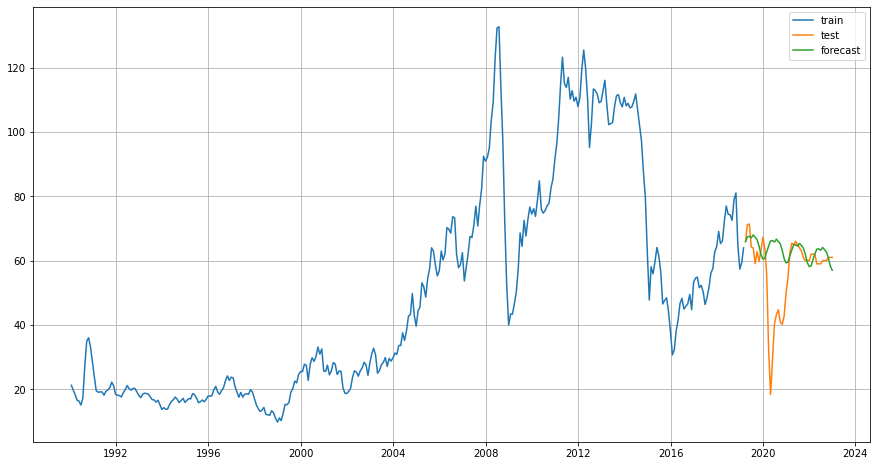

In [34]:
TES_predict = TES_model.forecast(len(test))

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(TES_predict,label='forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [36]:
print("MAE:",MAE(test['dollars_per_barrel'],TES_predict))
print("MAPE:",MAPE(test['dollars_per_barrel'],TES_predict))

MAE: 7.981381778763292
MAPE: 21.756329079155496


##### ACF and PACF plots

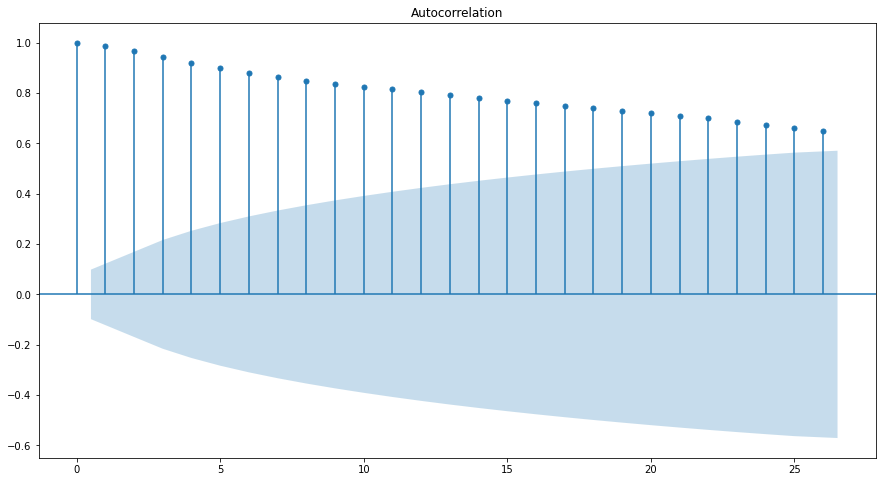

In [37]:
plot_acf(df)
plt.show()

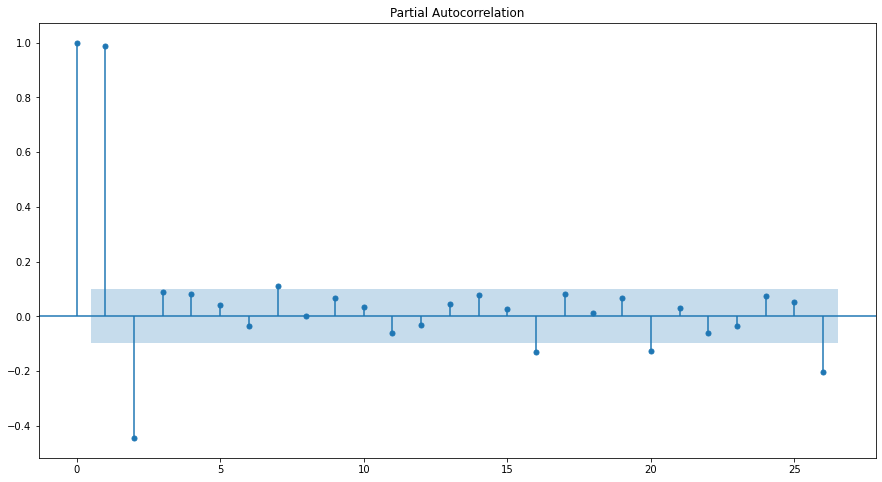

In [197]:
plot_pacf(df)
plt.show()

##### DickyFuller test

In [38]:
observations = df.values
df_results = adfuller(observations)
df_results

(-2.3662084811231283,
 0.1515017802971504,
 1,
 394,
 {'1%': -3.4470566389664703,
  '5%': -2.8689037160476016,
  '10%': -2.570692663557422},
 2212.551893789197)

In [87]:
##### Non-stationary series -- proceed with ARIMA & SARIMA model

In [199]:
diff_val = df.diff(periods=1).dropna()
obs_diff = diff_val.values
diff_res = adfuller(obs_diff)
diff_res

(-13.287381903538753,
 7.480882139513171e-25,
 0,
 394,
 {'1%': -3.4470566389664703,
  '5%': -2.8689037160476016,
  '10%': -2.570692663557422},
 2211.0091292243483)

##### ARIMA Model

In [201]:
import itertools

In [202]:
p = q = range(0,4)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
print("Parameter combinations are:")
for i in range(1,len(pdq)):
    print("ARIMA",pdq[i])

Parameter combinations are:
ARIMA (0, 1, 1)
ARIMA (0, 1, 2)
ARIMA (0, 1, 3)
ARIMA (1, 1, 0)
ARIMA (1, 1, 1)
ARIMA (1, 1, 2)
ARIMA (1, 1, 3)
ARIMA (2, 1, 0)
ARIMA (2, 1, 1)
ARIMA (2, 1, 2)
ARIMA (2, 1, 3)
ARIMA (3, 1, 0)
ARIMA (3, 1, 1)
ARIMA (3, 1, 2)
ARIMA (3, 1, 3)


In [203]:
df_score_arima = pd.DataFrame(columns=['param','aic'])
df_score_arima

,param,aic


In [204]:
from warnings import filterwarnings
filterwarnings('ignore')

In [205]:
for param in pdq:
    try:
        model = ARIMA(train,order=param)
        arima_results = model.fit()
        print("ARIMA",param,"AIC:",arima_results.aic)
        df_score_arima = df_score_arima.append({'param':param,'aic':arima_results.aic},ignore_index=True)
    except:
        continue

ARIMA (0, 1, 0) AIC: 2076.6558531620794
ARIMA (0, 1, 1) AIC: 2033.884316874647
ARIMA (0, 1, 2) AIC: 2029.7723680100944
ARIMA (0, 1, 3) AIC: 2031.6321133118984
ARIMA (1, 1, 0) AIC: 2028.529018899086
ARIMA (1, 1, 1) AIC: 2030.4333795057196
ARIMA (1, 1, 2) AIC: 2031.6928696686946
ARIMA (1, 1, 3) AIC: 2029.581003949523
ARIMA (2, 1, 0) AIC: 2030.4041413104542
ARIMA (2, 1, 1) AIC: 2027.628594424724
ARIMA (2, 1, 2) AIC: 2029.1404437131703
ARIMA (2, 1, 3) AIC: 2033.0487024341176
ARIMA (3, 1, 0) AIC: 2031.2472304571668
ARIMA (3, 1, 1) AIC: 2029.156581117654
ARIMA (3, 1, 2) AIC: 2031.055428849493
ARIMA (3, 1, 3) AIC: 2029.8977136953802


In [206]:
df_score_arima.sort_values('aic')

,param,aic
9,"(2, 1, 1)",2027.628594
4,"(1, 1, 0)",2028.529019
10,"(2, 1, 2)",2029.140444
13,"(3, 1, 1)",2029.156581
7,"(1, 1, 3)",2029.581004
2,"(0, 1, 2)",2029.772368
15,"(3, 1, 3)",2029.897714
8,"(2, 1, 0)",2030.404141
5,"(1, 1, 1)",2030.433380
14,"(3, 1, 2)",2031.055429


In [39]:
arima_model = ARIMA(train,(2,1,1))
arima_results = arima_model.fit()
print(arima_results.summary())

                              ARIMA Model Results                               
Dep. Variable:     D.dollars_per_barrel   No. Observations:                  349
Model:                   ARIMA(2, 1, 1)   Log Likelihood               -1008.814
Method:                         css-mle   S.D. of innovations              4.355
Date:                  Thu, 31 Mar 2022   AIC                           2027.629
Time:                          18:55:09   BIC                           2046.904
Sample:                      02-28-1990   HQIC                          2035.302
                           - 02-28-2019                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1308      0.207      0.632      0.527      -0.275       0.536
ar.L1.D.dollars_per_barrel     1.2972      0.099     13.049      0.

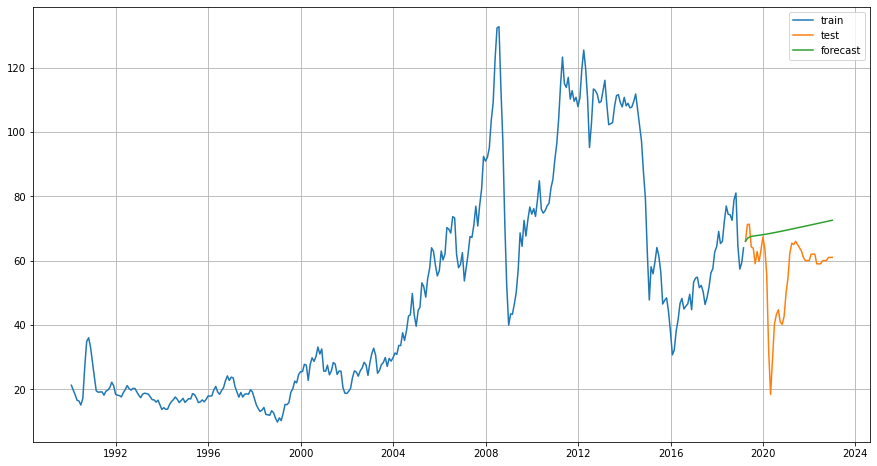

In [40]:
forecasted_values_arima = pd.Series(arima_results.forecast(len(test))[0],index=test.index)

# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecasted_values_arima,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [41]:
print("MAE:",MAE(test['dollars_per_barrel'],forecasted_values_arima))
print("MAPE:",MAPE(test['dollars_per_barrel'],forecasted_values_arima))

MAE: 13.036301527276143
MAPE: 31.03135189702933


##### SARIMA Model

In [234]:
import itertools

In [265]:
p = q = range(0,4)
d = range(1,2)
pdq = list(itertools.product(p,d,q))
pdq_seasonal = [(x[0],x[1],x[2],26) for x in list(itertools.product(p,d,q))]

df_score = pd.DataFrame(columns=['param','seasonal','aic'])
df_score

,param,seasonal,aic


In [266]:
for param in pdq:
    for seasonal_param in pdq_seasonal:
        model = SARIMAX(train,
                       order = param,
                       seasonal_order = seasonal_param,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        sarimax_results = model.fit()
        print("SARIMAX",param,seasonal_param,'AIC:',sarimax_results.aic)
        df_score = df_score.append({'param':param,'seasonal':seasonal_param,'aic':sarimax_results.aic},ignore_index=True)

SARIMAX (0, 1, 0) (0, 1, 0, 26) AIC: 2166.581863676741
SARIMAX (0, 1, 0) (0, 1, 1, 26) AIC: 1837.7896622535702
SARIMAX (0, 1, 0) (0, 1, 2, 26) AIC: 1695.5306211670968
SARIMAX (0, 1, 0) (0, 1, 3, 26) AIC: 1558.5501739632953
SARIMAX (0, 1, 0) (1, 1, 0, 26) AIC: 1906.3185615225802
SARIMAX (0, 1, 0) (1, 1, 1, 26) AIC: 1839.7520274583858
SARIMAX (0, 1, 0) (1, 1, 2, 26) AIC: 1693.757734874409
SARIMAX (0, 1, 0) (1, 1, 3, 26) AIC: 1556.3123281150724
SARIMAX (0, 1, 0) (2, 1, 0, 26) AIC: 1735.830969628852
SARIMAX (0, 1, 0) (2, 1, 1, 26) AIC: 1701.1224547409784
SARIMAX (0, 1, 0) (2, 1, 2, 26) AIC: 1695.7572238392195
SARIMAX (0, 1, 0) (2, 1, 3, 26) AIC: 1555.188661336087
SARIMAX (0, 1, 0) (3, 1, 0, 26) AIC: 1583.046579700247
SARIMAX (0, 1, 0) (3, 1, 1, 26) AIC: 1573.5818449331914
SARIMAX (0, 1, 0) (3, 1, 2, 26) AIC: 1562.951489277208
SARIMAX (0, 1, 0) (3, 1, 3, 26) AIC: 1557.1879822665564
SARIMAX (0, 1, 1) (0, 1, 0, 26) AIC: 2127.445686614932
SARIMAX (0, 1, 1) (0, 1, 1, 26) AIC: 1799.7823204907288

SARIMAX (2, 1, 1) (1, 1, 0, 26) AIC: 1855.47551270111
SARIMAX (2, 1, 1) (1, 1, 1, 26) AIC: 1804.297793918454
SARIMAX (2, 1, 1) (1, 1, 2, 26) AIC: 1657.648456685635
SARIMAX (2, 1, 1) (1, 1, 3, 26) AIC: 1523.4310197074424
SARIMAX (2, 1, 1) (2, 1, 0, 26) AIC: 1683.892487049982
SARIMAX (2, 1, 1) (2, 1, 1, 26) AIC: 1661.2328591999262
SARIMAX (2, 1, 1) (2, 1, 2, 26) AIC: 1664.9679721343682
SARIMAX (2, 1, 1) (2, 1, 3, 26) AIC: 1521.035873193565
SARIMAX (2, 1, 1) (3, 1, 0, 26) AIC: 1541.063633540287
SARIMAX (2, 1, 1) (3, 1, 1, 26) AIC: 1526.272340635015
SARIMAX (2, 1, 1) (3, 1, 2, 26) AIC: 1524.5242736837895
SARIMAX (2, 1, 1) (3, 1, 3, 26) AIC: 1524.5491318315123
SARIMAX (2, 1, 2) (0, 1, 0, 26) AIC: 2109.7252838921163
SARIMAX (2, 1, 2) (0, 1, 1, 26) AIC: 1790.7685441095655
SARIMAX (2, 1, 2) (0, 1, 2, 26) AIC: 1654.3737412975283
SARIMAX (2, 1, 2) (0, 1, 3, 26) AIC: 1519.4062801721802
SARIMAX (2, 1, 2) (1, 1, 0, 26) AIC: 1856.0176363286273
SARIMAX (2, 1, 2) (1, 1, 1, 26) AIC: 1792.7187855676648


In [268]:
df_score.sort_values('aic')

,param,seasonal,aic
59,"(0, 1, 3)","(2, 1, 3, 26)",1510.608633
123,"(1, 1, 3)","(2, 1, 3, 26)",1511.352898
187,"(2, 1, 3)","(2, 1, 3, 26)",1511.753811
63,"(0, 1, 3)","(3, 1, 3, 26)",1512.609521
183,"(2, 1, 3)","(1, 1, 3, 26)",1513.511237
...,...,...,...
80,"(1, 1, 1)","(0, 1, 0, 26)",2117.435229
144,"(2, 1, 1)","(0, 1, 0, 26)",2118.162632
64,"(1, 1, 0)","(0, 1, 0, 26)",2122.679145
16,"(0, 1, 1)","(0, 1, 0, 26)",2127.445687


In [42]:
model = SARIMAX(train,
                       order = (0,1,3),
                       seasonal_order = (2,1,3,26),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarimax_results = model.fit()

In [43]:
print(sarimax_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 dollars_per_barrel   No. Observations:                  350
Model:             SARIMAX(0, 1, 3)x(2, 1, 3, 26)   Log Likelihood                -746.304
Date:                            Thu, 31 Mar 2022   AIC                           1510.609
Time:                                    19:06:13   BIC                           1541.972
Sample:                                01-31-1990   HQIC                          1523.244
                                     - 02-28-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3623      0.057      6.368      0.000       0.251       0.474
ma.L2          0.1669      0.047   

In [44]:
forecast = sarimax_results.forecast(len(test))

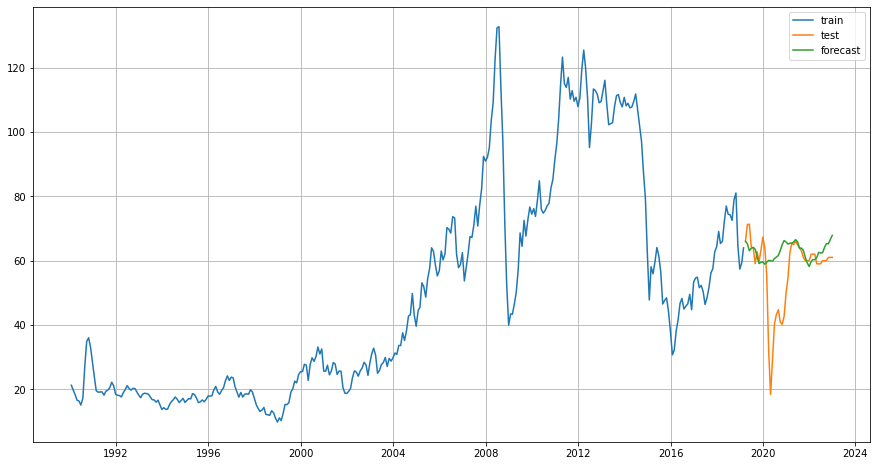

In [45]:
# visualizing the forecasted values:

plt.plot(train,label='train')
plt.plot(test,label='test')
plt.plot(forecast,label='forecast')
plt.grid()
plt.legend(loc='best')
plt.show()

In [47]:
print("MAE:",MAE(test['dollars_per_barrel'],forecast))
print("MAPE:",MAPE(test['dollars_per_barrel'],forecast))

MAE: 7.5862405997513065
MAPE: 20.087745637474065


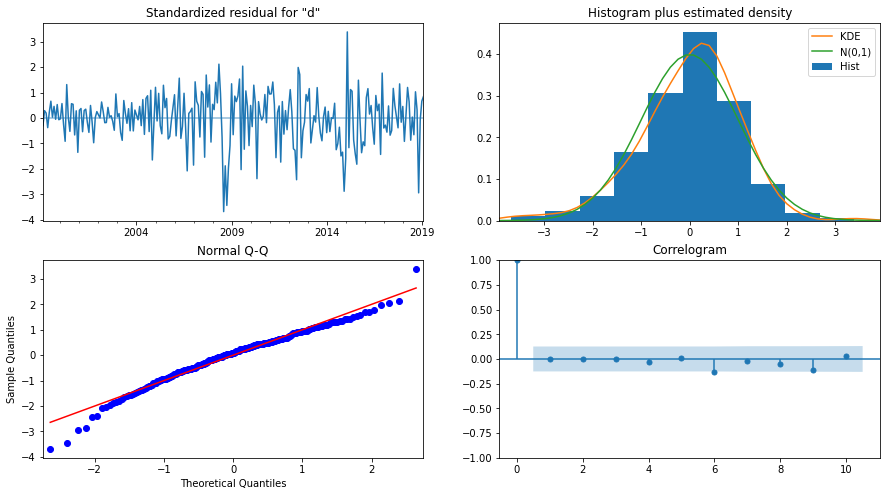

In [48]:
sarimax_results.plot_diagnostics();

# ARCH/GARCH Model

In [14]:
df

,dollars_per_barrel
time_stamp,
1990-01-31,21.251
1990-02-28,19.813
1990-03-31,18.387
1990-04-30,16.612
1990-05-31,16.352
...,...
2022-08-31,60.000
2022-09-30,60.000
2022-10-31,61.000


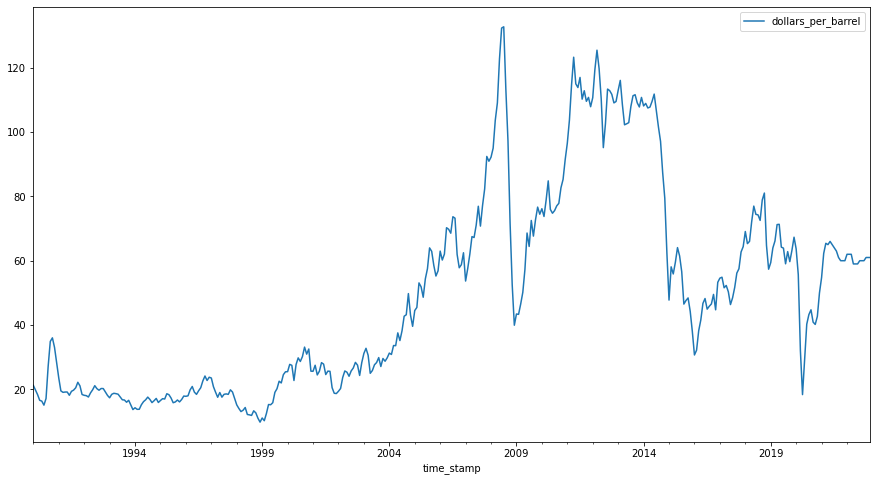

In [15]:
df.plot()
plt.show()

In [16]:
DES = Holt(df,exponential=False,initialization_method='estimated')
DES_model = DES.fit(smoothing_level=1.0000000,
                   smoothing_trend=0.1)
DES_model.summary()

Dep. Variable:,dollars_per_barrel,No. Observations:,396
Model:,Holt,SSE,9545.713
Optimized:,True,AIC,1268.244
Trend:,Additive,BIC,1284.169
Seasonal:,None,AICC,1268.459
Seasonal Periods:,None,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,13:00:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
smoothing_trend,0.1000000,beta,False


In [17]:
resid = DES_model.resid

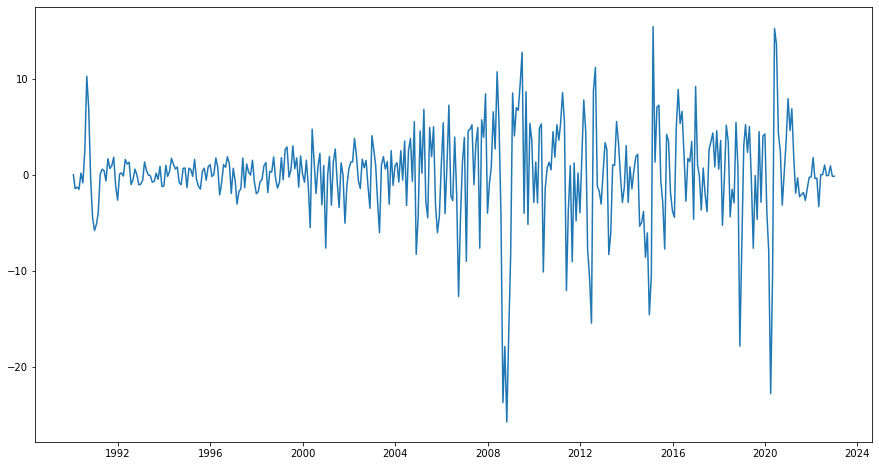

In [18]:
plt.plot(resid)
plt.show()

In [20]:
resid_df = pd.DataFrame(resid,columns=['residuals'])
resid_df.shape

(396, 1)

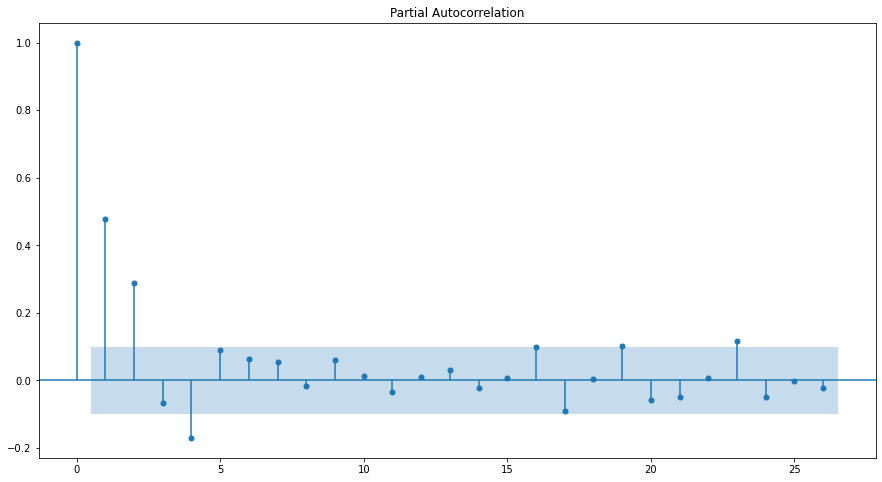

In [21]:
plot_pacf(resid_df**2)
plt.show()

##### ARCH - 1 Model

In [22]:
model_1 = arch_model(resid_df,p=1,q=0)
model_fit_1 = model_1.fit(disp='off')
model_fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1117.31
Distribution:                  Normal   AIC:                           2240.62
Method:            Maximum Likelihood   BIC:                           2252.56
                                        No. Observations:                  396
Date:                Fri, Apr 01 2022   Df Residuals:                      395
Time:                        13:03:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0450      0.176      0.256      0.798 [ -0.299,  0.389]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          8.1880      2.072      3.951  7.781e-05 [  4.126, 12.250]
alpha[1]       0.8297      0.221      3.762  1.686e-04 [  0.397,  1.262]
========================================================================

Covariance estimator: robust
"""

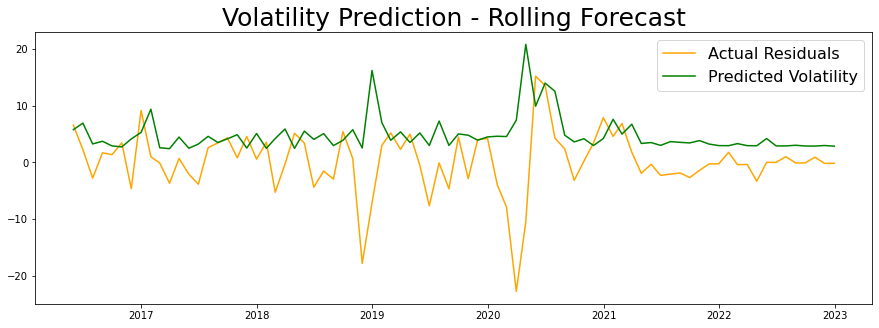

In [26]:
rolling_predictions = []
test_size = 80

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=1, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### GARCH (1,1) Model

In [27]:
model_2 = arch_model(resid_df,p=1,q=1)
model_fit_2 = model_2.fit(disp='off')
model_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1061.41
Distribution:                  Normal   AIC:                           2130.81
Method:            Maximum Likelihood   BIC:                           2146.74
                                        No. Observations:                  396
Date:                Fri, Apr 01 2022   Df Residuals:                      395
Time:                        13:07:12   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0335      0.101     -0.333      0.739 [ -0.230,  0.164]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2524      0.282      0.896      0.370 [ -0.299,  0.804]
alpha[1]       0.3052  7.266e-02      4.200  2.672e-05 [  0.163,  0.448]
beta[1]        0.6948  9.019e-02      7.704  1.319e-14 [  0.518,  0.872]
========================================================================

Covariance estimator: robust
"""

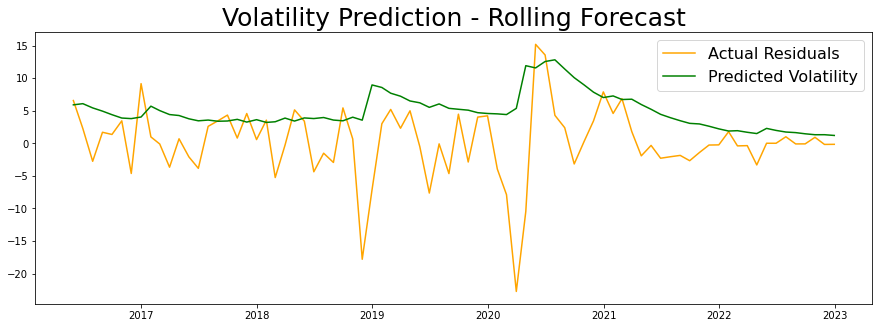

In [28]:
rolling_predictions = []
test_size = 80

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 2 Model

In [29]:
model_3 = arch_model(resid_df,p=2,q=0)
model_fit_3 = model_3.fit(disp='off')
model_fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1077.37
Distribution:                  Normal   AIC:                           2162.74
Method:            Maximum Likelihood   BIC:                           2178.67
                                        No. Observations:                  396
Date:                Fri, Apr 01 2022   Df Residuals:                      395
Time:                        13:08:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0558      0.120     -0.464      0.642 [ -0.291,  0.180]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          2.9961      0.896      3.346  8.213e-04 [  1.241,  4.751]
alpha[1]       0.4467      0.112      3.973  7.111e-05 [  0.226,  0.667]
alpha[2]       0.5533      0.136      4.066  4.773e-05 [  0.287,  0.820]
========================================================================

Covariance estimator: robust
"""

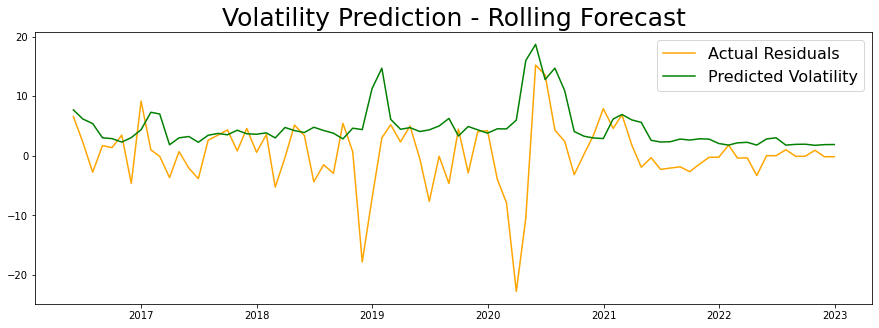

In [30]:
rolling_predictions = []
test_size = 80

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 3 Model

In [31]:
model_4 = arch_model(resid_df,p=3,q=0)
model_fit_4 = model_4.fit(disp='off')
model_fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1065.92
Distribution:                  Normal   AIC:                           2141.85
Method:            Maximum Likelihood   BIC:                           2161.75
                                        No. Observations:                  396
Date:                Fri, Apr 01 2022   Df Residuals:                      395
Time:                        13:09:43   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0610      0.111     -0.552      0.581 [ -0.278,  0.156]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.8826      0.785      2.398  1.651e-02   [  0.344,  3.422]
alpha[1]       0.3464      0.110      3.148  1.642e-03   [  0.131,  0.562]
alpha[2]       0.4556      0.117      3.900  9.615e-05   [  0.227,  0.685]
alpha[3]       0.1980  8.395e-02      2.359  1.834e-02 [3.347e-02,  0.363]
==========================================================================

Covariance estimator: robust
"""

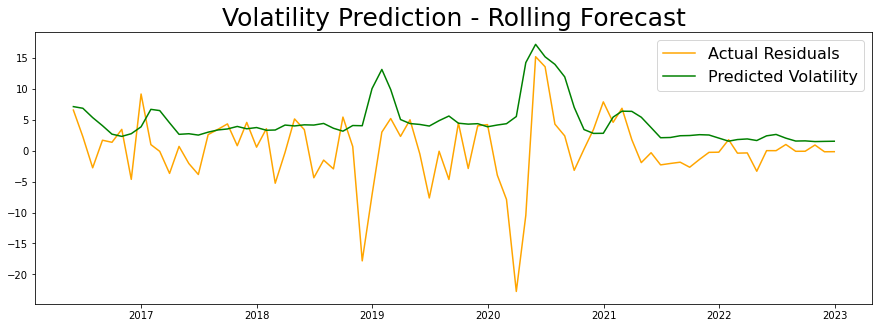

In [32]:
rolling_predictions = []
test_size = 80

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 4 Model

In [33]:
model_5 = arch_model(resid_df,p=4,q=0)
model_fit_5 = model_5.fit(disp='off')
model_fit_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1065.81
Distribution:                  Normal   AIC:                           2143.62
Method:            Maximum Likelihood   BIC:                           2167.51
                                        No. Observations:                  396
Date:                Fri, Apr 01 2022   Df Residuals:                      395
Time:                        13:10:45   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0660      0.110     -0.601      0.548 [ -0.281,  0.149]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.8484      0.755      2.449  1.434e-02    [  0.369,  3.328]
alpha[1]       0.3470      0.110      3.147  1.649e-03    [  0.131,  0.563]
alpha[2]       0.4585      0.118      3.901  9.597e-05    [  0.228,  0.689]
alpha[3]       0.1802  9.912e-02      1.819  6.899e-02 [-1.402e-02,  0.375]
alpha[4]       0.0143  4.481e-02      0.319      0.749 [-7.351e-02,  0.102]
===========================================================================

Covariance estimator: robust
"""

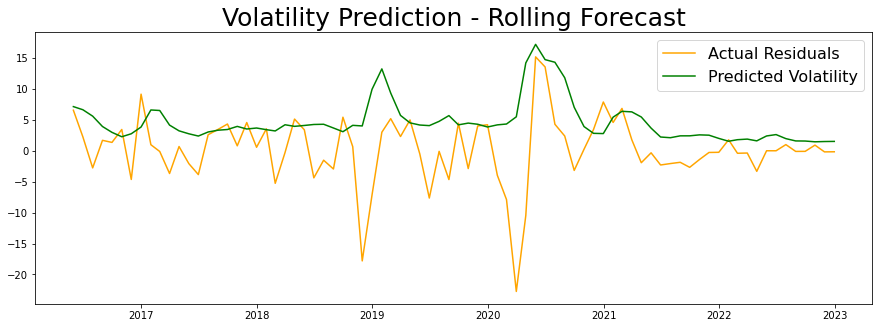

In [34]:
rolling_predictions = []
test_size = 80

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=4, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### ARCH - 5 Model

In [37]:
model_6 = arch_model(resid_df,p=5,q=0)
model_fit_6 = model_6.fit(disp='off')
model_fit_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1062.62
Distribution:                  Normal   AIC:                           2139.25
Method:            Maximum Likelihood   BIC:                           2167.12
                                        No. Observations:                  396
Date:                Fri, Apr 01 2022   Df Residuals:                      395
Time:                        13:12:03   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0707      0.108     -0.655      0.513 [ -0.282,  0.141]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.4061      0.645      2.180  2.925e-02      [  0.142,  2.670]
alpha[1]       0.3484      0.112      3.104  1.909e-03      [  0.128,  0.568]
alpha[2]       0.3969      0.110      3.610  3.066e-04      [  0.181,  0.612]
alpha[3]       0.1547  8.642e-02      1.790  7.340e-02   [-1.466e-02,  0.324]
alpha[4]       0.0198  3.675e-02      0.538      0.591 [-5.228e-02,9.180e-02]
alpha[5]       0.0802  5.373e-02      1.493      0.135   [-2.508e-02,  0.186]
=============================================================================

Covariance estimator: robust
"""

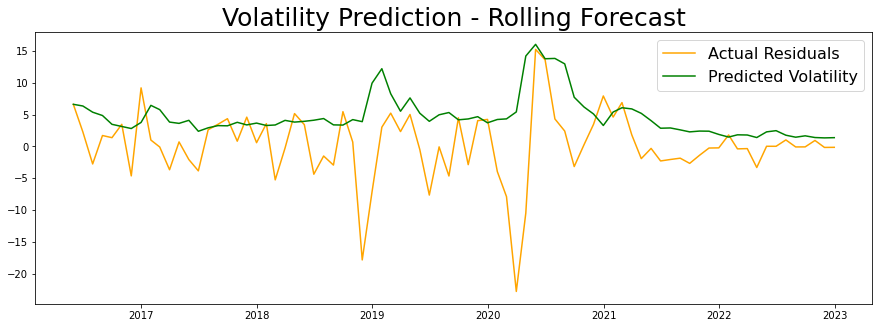

In [36]:
rolling_predictions = []
test_size = 80

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=6, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### GARCH (1,2) Model

In [38]:
model_7 = arch_model(resid_df,p=1,q=2)
model_fit_7 = model_7.fit(disp='off')
model_fit_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1061.41
Distribution:                  Normal   AIC:                           2132.81
Method:            Maximum Likelihood   BIC:                           2152.72
                                        No. Observations:                  396
Date:                Fri, Apr 01 2022   Df Residuals:                      395
Time:                        13:13:09   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0335      0.104     -0.321      0.748 [ -0.238,  0.171]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2524      0.291      0.866      0.387 [ -0.319,  0.824]
alpha[1]       0.3052  7.836e-02      3.894  9.849e-05 [  0.152,  0.459]
beta[1]        0.6948      0.254      2.732  6.297e-03 [  0.196,  1.193]
beta[2]        0.0000      0.179      0.000      1.000 [ -0.351,  0.351]
========================================================================

Covariance estimator: robust
"""

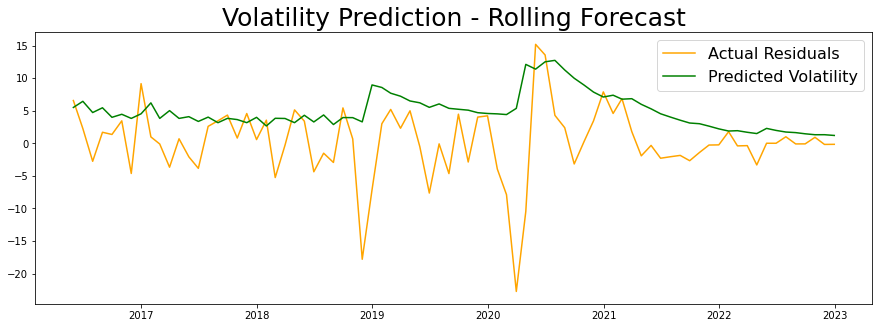

In [39]:
rolling_predictions = []
test_size = 80

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=1, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### GARCH (2,1) Model

In [40]:
model_8 = arch_model(resid_df,p=2,q=1)
model_fit_8 = model_8.fit(disp='off')
model_fit_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1061.40
Distribution:                  Normal   AIC:                           2132.81
Method:            Maximum Likelihood   BIC:                           2152.72
                                        No. Observations:                  396
Date:                Fri, Apr 01 2022   Df Residuals:                      395
Time:                        13:13:57   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0343      0.121     -0.283      0.778 [ -0.272,  0.204]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2577      0.489      0.527      0.598   [ -0.701,  1.217]
alpha[1]       0.3033      0.116      2.605  9.198e-03 [7.507e-02,  0.532]
alpha[2]   5.5387e-03      0.249  2.227e-02      0.982   [ -0.482,  0.493]
beta[1]        0.6912      0.223      3.095  1.968e-03   [  0.253,  1.129]
==========================================================================

Covariance estimator: robust
"""

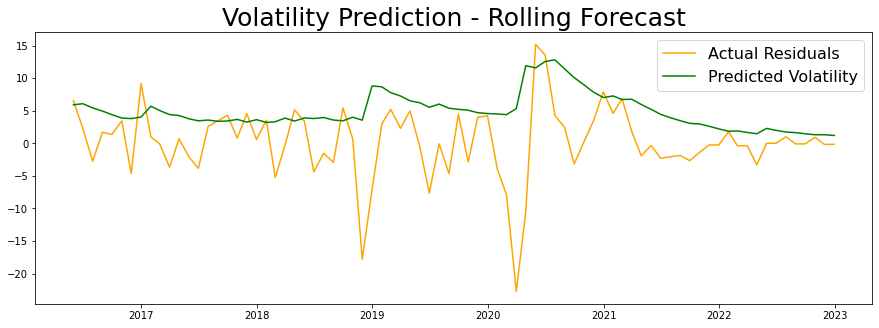

In [41]:
rolling_predictions = []
test_size = 80

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=2, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

##### GARCH (2,2) Model

In [42]:
model_9 = arch_model(resid_df,p=2,q=2)
model_fit_9 = model_9.fit(disp='off')
model_fit_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1061.19
Distribution:                  Normal   AIC:                           2134.38
Method:            Maximum Likelihood   BIC:                           2158.27
                                        No. Observations:                  396
Date:                Fri, Apr 01 2022   Df Residuals:                      395
Time:                        13:14:45   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0439      0.194     -0.226      0.821 [ -0.424,  0.336]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.4306      2.945      0.146      0.884   [ -5.342,  6.203]
alpha[1]       0.2923      0.105      2.794  5.200e-03 [8.727e-02,  0.497]
alpha[2]       0.1669      0.999      0.167      0.867   [ -1.791,  2.125]
beta[1]        0.3402      1.649      0.206      0.837   [ -2.891,  3.572]
beta[2]        0.2006      0.401      0.501      0.616   [ -0.584,  0.986]
==========================================================================

Covariance estimator: robust
"""

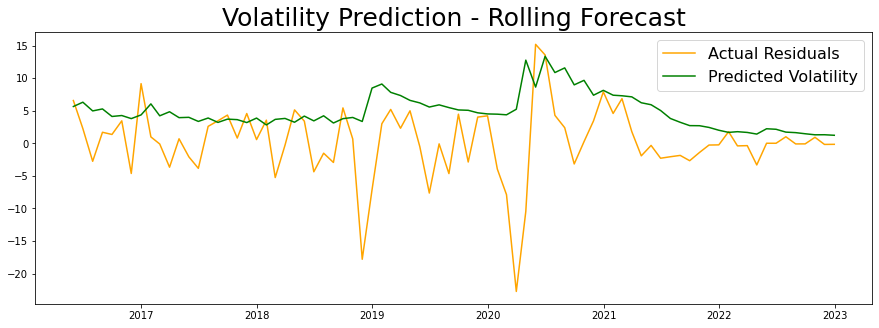

In [43]:
rolling_predictions = []
test_size = 80

for i in range(test_size):
    train = resid_df[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=resid_df.index[-test_size:])

plt.figure(figsize=(15,5))
true, = plt.plot(resid_df[-test_size:],'orange')
preds, = plt.plot(rolling_predictions,'green')
plt.title('Volatility Prediction - Rolling Forecast', fontsize=25)
plt.legend(['Actual Residuals', 'Predicted Volatility'], fontsize=16)
plt.show()

# Future Predictions

##### ARCH - 1 Prediction

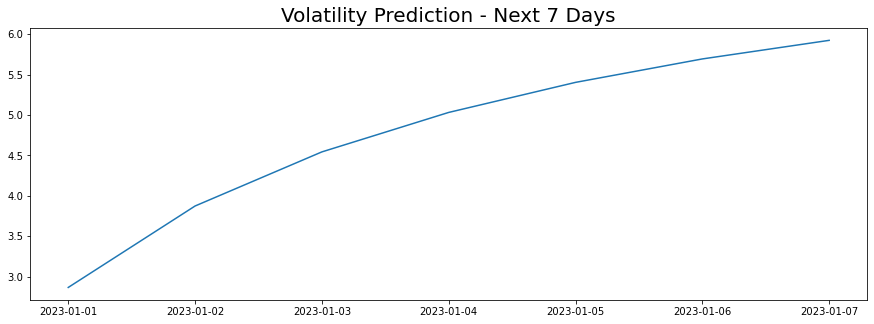

In [51]:
final_df = resid_df
final_model = arch_model(final_df, p=1, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 2 Prediction

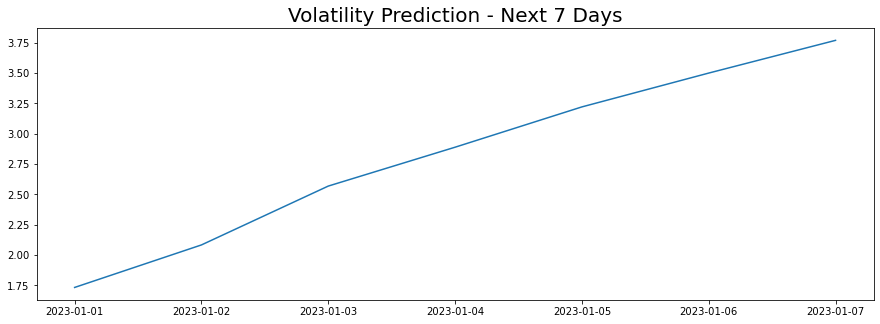

In [45]:
final_df = resid_df
final_model = arch_model(final_df, p=2, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### ARCH - 3 Prediction

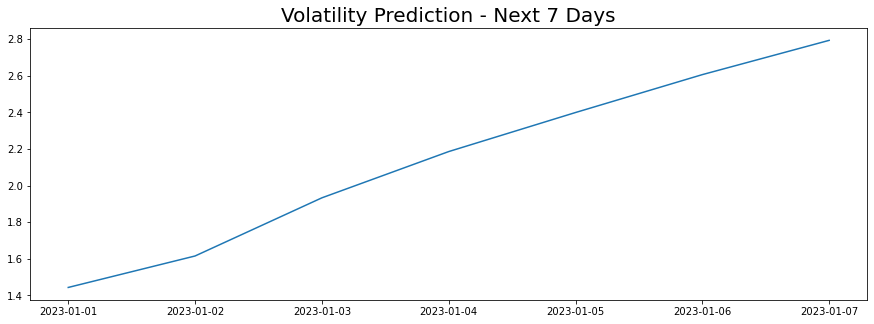

In [46]:
final_df = resid_df
final_model = arch_model(final_df, p=3, q=0)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### GARCH (1,1) Prediction

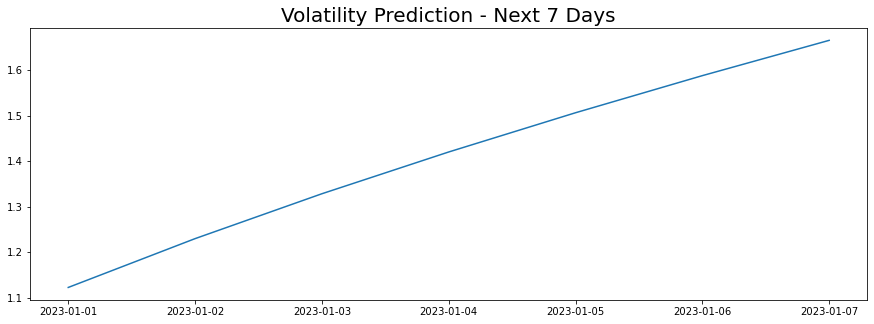

In [47]:
final_df = resid_df
final_model = arch_model(final_df, p=1, q=1)
final_model_fit = final_model.fit(disp='off')

final_pred = final_model_fit.forecast(horizon=7)
future_dates = [resid_df.index[-1] + timedelta(days=i) for i in range(1,8)]
final_pred = pd.Series(np.sqrt(final_pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(15,5))
plt.plot(final_pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.show()

##### Conclusion:

- Based on the significance of the model parameters and the AIC Score, we can conclude that the ARCH - 3 Model is the best fit model and the future predictions can be done using this model.